# HOW MUCH DID IT RAIN ?

For agriculture, it is extremely important to know how much it rained on a particular field. However, rainfall is variable in space and time and it is impossible to have rain gauges everywhere. Therefore, remote sensing instruments such as radar are used to provide wide spatial coverage.

Rainfall estimates drawn from remotely sensed observations will never exactly match the measurements that are carried out using rain gauges, due to the inherent characteristics of both sensors. Currently, radar observations are "corrected" using nearby gauges and a single estimate of rainfall is provided to users who need to know how much it rained.

The Challenge is to solve this in probabilistic manner.Knowing the full probabilistic spread of rainfall amounts can be very useful to drive hydrological and agronomic models -- much more than a single estimate of rainfall.

<img src="dual_pol2.jpg">


Unlike a conventional Doppler radar, a polarimetric radar transmits radio wave pulses that have both horizontal and vertical orientations. Because rain drops become flatter as they increase in size and because ice crystals tend to be elongated vertically, whereas liquid droplets tend to be flattened, it is possible to infer the size of rain drops and the type of hydrometeor from the differential reflectivity of the two orientations.

We are given polarimetric radar values and derived quantities at a location over the period of one hour. You will need to produce a probabilistic distribution of the hourly rain gauge total. 

#### ABOUT POLAMETRIC RADAR MEASUREMNTS 

Polarimetric radar offers the promise of being able to better infer drop-sizes and thus improve rainfall estimates since smaller drops evaporate more and of being able to distinguish between echoes due to bioscatter and echoes due to weather.  The US National Weather Service's weather radar network (called NEXRAD) was recently upgraded to polarimetry, and it is the polarimetric radar data collected after the upgrade that you are provided.


This is an kaggle competition and you can download the dataset from the link given below:
https://www.kaggle.com/c/how-much-did-it-rain/data


## LET'S START OUR JOURNEY
Before understanding the data set I will be importing the python libraries that will be used later

In [1]:
# importing the basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# IMPORTING other libraires which will be used
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [2]:
train=pd.read_csv("train_2013.csv")
test=pd.read_csv("test_2014.csv")

print("Training Size : (%d,%d)"%train.shape)
print("Test Size : (%d,%d)"%test.shape)

Training Size : (1126694,20)
Test Size : (630452,19)


In [3]:
train.head(10)

,Id,TimeToEnd,DistanceToRadar,Composite,HybridScan,HydrometeorType,Kdp,RR1,RR2,RR3,RadarQualityIndex,Reflectivity,ReflectivityQC,RhoHV,Velocity,Zdr,LogWaterVolume,MassWeightedMean,MassWeightedSD,Expected
0,1,56.0 37.0 31.0 25.0 19.0 13.0 7.0 2.0,30.0 30.0 30.0 30.0 30.0 30.0 30.0 30.0,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,8.0 8.0 8.0 8.0 8.0 8.0 8.0 8.0,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,0.006246 0.0200476 0.0113924 0.217157 0.028566...,13.0 17.5 14.0 8.5 7.0 11.0 9.0 9.0,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,0.865 0.841667 0.765 0.985 0.768333 0.491667 0...,-99901.0 -99901.0 -99901.0 -99901.0 -99901.0 -...,7.9375 4.5 4.1875 5.5625 3.375 7.0625 5.3125 6...,nan nan nan nan nan nan nan nan,nan nan nan nan nan nan nan nan,nan nan nan nan nan nan nan nan,0.0
1,2,58.0 48.0 38.0 29.0 19.0 9.0,77.0 77.0 77.0 77.0 77.0 77.0,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,8.0 8.0 8.0 8.0 8.0 8.0,0.0 0.0 0.0 0.0 0.0 0.0,0.0 0.0 0.0 0.0 0.0 0.0,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,999.0 999.0 999.0 999.0 999.0 999.0,15.0 18.5 10.5 3.0 0.5 -3.0,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,0.635 0.851667 0.891667 0.638333 0.791667 0.73...,-4.0 -3.0 -2.0 -0.5 -4.0 3.0,2.6875 3.0 2.375 6.25 3.125 6.0625,nan nan nan nan nan nan,nan nan nan nan nan nan,nan nan nan nan nan nan,0.0
2,3,59.0 20.0,75.0 75.0,-99900.0 -99900.0,-99900.0 -99900.0,8.0 8.0,0.0 0.0,0.0 0.0,-99900.0 -99900.0,-99900.0 -99900.0,999.0 999.0,6.5 4.0,-99900.0 -99900.0,0.998333 0.891667,-99900.0 -3.5,-6.5 -4.6875,nan nan,nan nan,nan nan,0.0
3,4,53.0 43.0 34.0 24.0 14.0 5.0,21.0 21.0 21.0 21.0 21.0 21.0,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,8.0 8.0 8.0 8.0 8.0 8.0,0.0 0.0 0.0 0.0 0.0 0.0,0.0 0.0 0.0 0.0 0.0 0.0,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,0.0 0.0 0.0 0.0 0.0 0.0,11.0 14.0 12.0 11.0 13.0 15.5,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,0.688333 0.518333 0.708333 0.805 0.708333 0.555,-7.0 -12.0 -11.5 -8.5 -8.0 -13.0,-0.375 5.0625 1.1875 2.0 2.0625 0.3125,nan nan nan nan nan nan,nan nan nan nan nan nan,nan nan nan nan nan nan,0.0
4,5,56.0 52.0 43.0 59.0 54.0 48.0 42.0 36.0 31.0 5...,69.0 69.0 69.0 83.0 83.0 83.0 83.0 83.0 83.0 5...,23.0 24.0 22.0 15.5 14.5 16.0 15.0 18.5 12.5 1...,13.5 15.5 19.0 -99900.0 -99900.0 -99900.0 -999...,9.0 9.0 9.0 8.0 8.0 8.0 8.0 9.0 9.0 9.0 9.0 9....,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0....,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.27899 0....,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,1.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.996433 0...,14.0 14.0 17.0 24.5 23.5 21.5 25.0 16.0 21.0 1...,14.0 14.0 17.0 -99900.0 -99900.0 -99900.0 -999...,1.01833 1.01167 0.991667 1.015 1.015 1.005 1.0...,14.0 13.5 12.5 -13.5 -19.5 -16.0 -15.0 -14.0 -...,0.9375 -0.875 -0.75 0.0 0.0625 0.3125 0.5625 -...,-13.4793885769 -12.1370512402 -11.6001776071 n...,1.86413642918 1.27740873124 1.35497004174 nan ...,0.755068594278 0.502681241559 0.514253049727 n...,0.0
5,6,56.0 47.0 37.0 27.0 18.0 8.0,1.0 1.0 1.0 1.0 1.0 1.0,-99900.0 -99900.0 -99900.0 -4.0 -99900.0 -99900.0,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,8.0 8.0 8.0 8.0 8.0 8.0,0.0 0.0 0.0 0.0 0.0 0.0,0.0 0.0 0.0 0.0 0.0 0.0,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,999.0 999.0 999.0 999.0 999.0 999.0,-13.5 -8.5 9.5 14.0 13.0 15.5,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,1.05167 0.988333 0.298333 0.215 0.301667 0.235,15.0 8.0 5.5 7.5 7.0 7.0,-0.9375 0.8125 3.1875 3.3125 -1.1875 1.6875,nan nan nan nan nan nan,nan nan nan nan nan nan,nan nan na

In [4]:
train.columns

Index(['Id', 'TimeToEnd', 'DistanceToRadar', 'Composite', 'HybridScan',
       'HydrometeorType', 'Kdp', 'RR1', 'RR2', 'RR3', 'RadarQualityIndex',
       'Reflectivity', 'ReflectivityQC', 'RhoHV', 'Velocity', 'Zdr',
       'LogWaterVolume', 'MassWeightedMean', 'MassWeightedSD', 'Expected'],
      dtype='object')

In [5]:
test.columns

Index(['Id', 'TimeToEnd', 'DistanceToRadar', 'Composite', 'HybridScan',
       'HydrometeorType', 'Kdp', 'RR1', 'RR2', 'RR3', 'RadarQualityIndex',
       'Reflectivity', 'ReflectivityQC', 'RhoHV', 'Velocity', 'Zdr',
       'LogWaterVolume', 'MassWeightedMean', 'MassWeightedSD'],
      dtype='object')

## UNDERSTANDING THE DATA 
There are 19 provided features, with three of these features being rain
rates predicted from three current algorithms. These three past algorithm
features, RR1, RR2, and RR3, are respectively, the ‘HCA-based’, ‘Zdrbased’,
and ‘Kdp-based’ algorithms. The other 16 features are given as time
series numerical data. An example data point could have its ‘TimeToEnd’
features ‘58.0 55.0 52.0 49.0 41.0,’ indicating radar information taken at 58,
55, . . . , 41 minutes from the end of the hour. For this same row, the features
‘Reflectivity’ as ‘0.0, 0.0, 1.2, 4.5, 0.0’ and ‘RR1’ as ‘0.0. 0.0, 2.2, 0.3, 0.0’
mean these measurements taken at the time points in the ‘TimeToEnd’ series.
The label(expected value) for each row is one float number, the amount in mm of rain
collected for that hour



### DESCRIPTION OF COLUMNS
The columns in the datasets are:

    TimeToEnd:  How many minutes before the end of the hour was this radar observation?

    DistanceToRadar:  Distance between radar and gauge.  This value is scaled and rounded to prevent reverse engineering gauge location

    Composite:  Maximum reflectivity in vertical volume above gauge

    HybridScan: Reflectivity in elevation scan closest to ground

    HydrometeorType:  One of nine categories in NSSL HCA. See presentation for details.

    Kdp:  Differential phase

    RR1:  Rain rate from HCA-based algorithm

    RR2:  Rain rate from Zdr-based algorithm

    RR3:  Rain rate from Kdp-based algorithm

    RadarQualityIndex:  A value from 0 (bad data) to 1 (good data)

    Reflectivity:  In dBZ

    ReflectivityQC:  Quality-controlled reflectivity

    RhoHV:  Correlation coefficient

    Velocity:  (aliased) Doppler velocity

    Zdr:  Differential reflectivity in dB

    LogWaterVolume:  How much of radar pixel is filled with water droplets?

    MassWeightedMean:  Mean drop size in mm

    MassWeightedSD:  Standard deviation of drop size

    Expected: the actual amount of rain reported by the rain gauge for that hour.

#### Hydrometeor types:

    0-no echo

    1-moderate rain

    2-moderate rain

    3-heavy rain

    4-rain/hail

    5-big drops

    6-AP

    7-Birds

    8-unknown

    9-no echo

    10-dry snow

    11-wet snow

    12-ice crystals

    13-graupel

    14-graupel

In [6]:
train['TimeToEnd'][6]

'59.0 55.0 51.0 46.0 42.0 38.0 33.0 29.0 25.0 20.0 16.0 12.0 7.0 3.0'

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1126694 entries, 0 to 1126693
Data columns (total 20 columns):
Id                   1126694 non-null int64
TimeToEnd            1126694 non-null object
DistanceToRadar      1126694 non-null object
Composite            1126694 non-null object
HybridScan           1126694 non-null object
HydrometeorType      1126694 non-null object
Kdp                  1126694 non-null object
RR1                  1126694 non-null object
RR2                  1126694 non-null object
RR3                  1126694 non-null object
RadarQualityIndex    1126694 non-null object
Reflectivity         1126694 non-null object
ReflectivityQC       1126694 non-null object
RhoHV                1126694 non-null object
Velocity             1126694 non-null object
Zdr                  1126694 non-null object
LogWaterVolume       975305 non-null object
MassWeightedMean     975305 non-null object
MassWeightedSD       975305 non-null object
Expected             1126694 non-nul

In [8]:
sample=pd.read_csv("sampleSubmission.csv")

sample.head(10)

,Id,Predicted0,Predicted1,Predicted2,Predicted3,Predicted4,Predicted5,Predicted6,Predicted7,Predicted8,...,Predicted60,Predicted61,Predicted62,Predicted63,Predicted64,Predicted65,Predicted66,Predicted67,Predicted68,Predicted69
0,1,0.493069,0.725573,0.877855,0.951306,0.981517,0.993120,0.997458,0.999063,0.999655,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2,0.500000,0.731059,0.880797,0.952574,0.982014,0.993307,0.997527,0.999089,0.999665,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,3,0.500000,0.731059,0.880797,0.952574,0.982014,0.993307,0.997527,0.999089,0.999665,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,4,0.500000,0.731059,0.880797,0.952574,0.982014,0.993307,0.997527,0.999089,0.999665,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,5,0.500000,0.731059,0.880797,0.952574,0.982014,0.993307,0.997527,0.999089,0.999665,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,6,0.500000,0.731059,0.880797,0.952574,0.982014,0.993307,0.997527,0.999089,0.999665,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,7,0.500000,0.731059,0.880797,0.952574,0.982014,0.993307,0.997527,0.999089,0.999665,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,8,0.500000,0.731059,0.880797,0.952574,0.982014,0.993307,0.997527,0.999089,0.999665,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,9,0.500000,0.731059,0.880797,0.952574,0.982014,0.993307,0.997527,0.999089,0.999665,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,10,0.002923,0.007905,0.021200,0.055601,0.137959,0.303149,0.541816,0.762721,0.897307,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [9]:
sample.columns

Index(['Id', 'Predicted0', 'Predicted1', 'Predicted2', 'Predicted3',
       'Predicted4', 'Predicted5', 'Predicted6', 'Predicted7', 'Predicted8',
       'Predicted9', 'Predicted10', 'Predicted11', 'Predicted12',
       'Predicted13', 'Predicted14', 'Predicted15', 'Predicted16',
       'Predicted17', 'Predicted18', 'Predicted19', 'Predicted20',
       'Predicted21', 'Predicted22', 'Predicted23', 'Predicted24',
       'Predicted25', 'Predicted26', 'Predicted27', 'Predicted28',
       'Predicted29', 'Predicted30', 'Predicted31', 'Predicted32',
       'Predicted33', 'Predicted34', 'Predicted35', 'Predicted36',
       'Predicted37', 'Predicted38', 'Predicted39', 'Predicted40',
       'Predicted41', 'Predicted42', 'Predicted43', 'Predicted44',
       'Predicted45', 'Predicted46', 'Predicted47', 'Predicted48',
       'Predicted49', 'Predicted50', 'Predicted51', 'Predicted52',
       'Predicted53', 'Predicted54', 'Predicted55', 'Predicted56',
       'Predicted57', 'Predicted58', 'Predicted59',

## Submission
Submissions are predictions of the probabilistic distribution of
the hourly rain total. Each row of the submission is a list of values P(y ≤ Y ),
for Y integer values 0, 1, 2, . . . 69, and y the rainfall total, in mm and it is obivous that for every y 

                                 P(y≤k) ≤ P(y ≤ k+1) 
For instance a perfect prediction
for the true label of "2.5" would be the row 0, 0, 0, 1, 1, . . . , 1 corresponding
to P r(y ≤ 0) = P r(y ≤ 1) = P r(y ≤ 2) = 0 and P r(y ≤ 3) = · · · =
P r(y ≤ 69) = 1.                                        
                                        
## MISSING DATA

 There are five types of missing data

-99900: echo below signal-to-noise threshold of radar.  In other words, the true value could be anywhere between -14 and -inf, but we don't know 

-99901: range folded data

-99903: data not collected such as due to beam blockage or beyond data range

nan: derived quantity could not be computed because some input was one of the above codes

999.0: RadarQualityIndex could not be computed because pixel was at edge of echo

Frequency plot of first 100 expected values. So that we can visualize how are expected values distributed

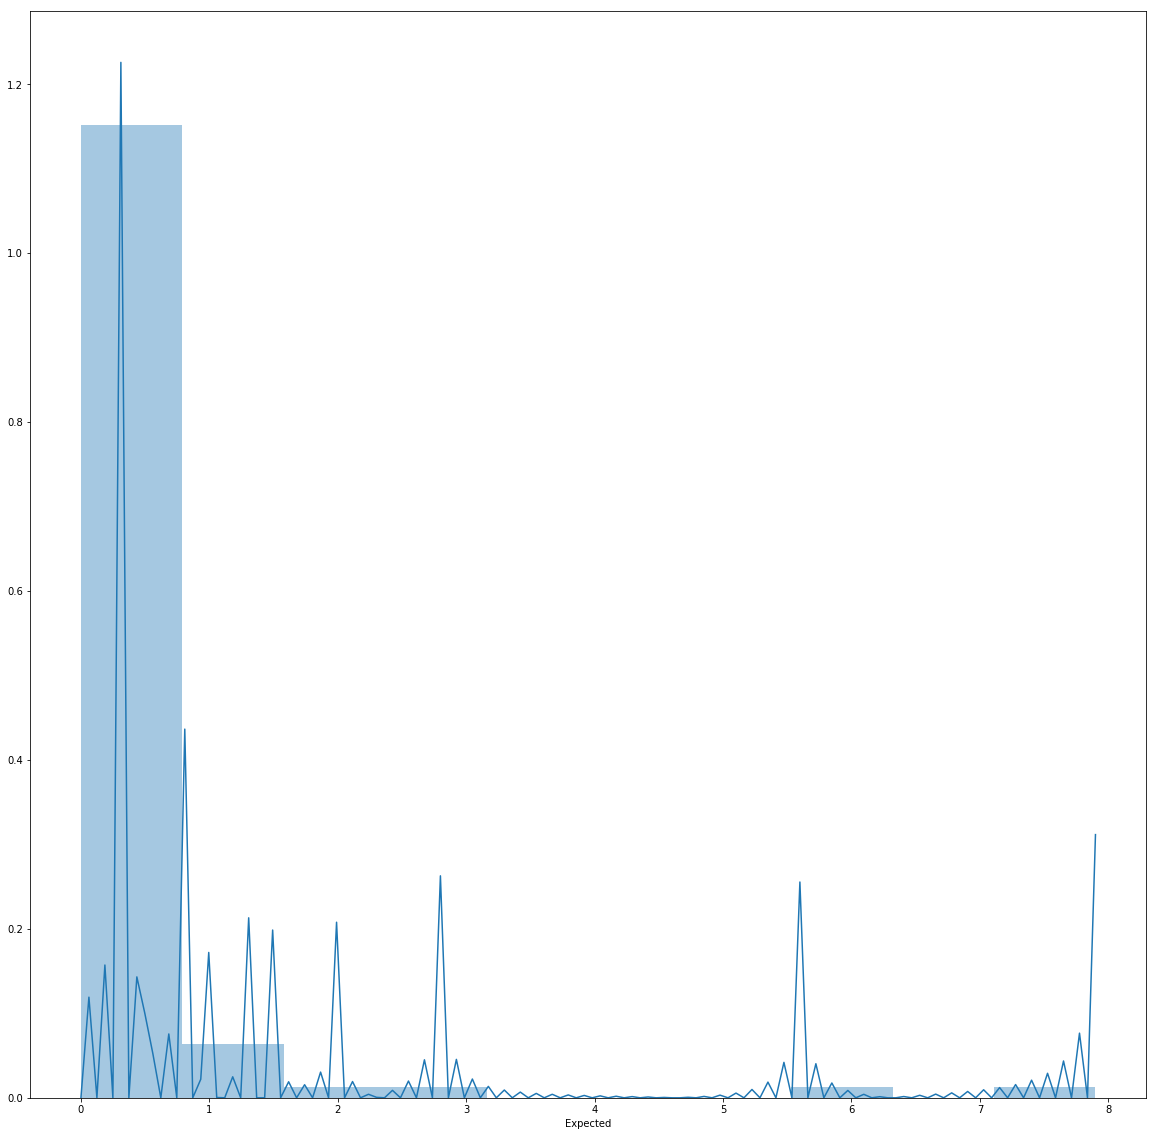

In [10]:
plt.subplots(figsize=(20,20))
sns.distplot(train['Expected'].head(100))

## BASIC MODELS

These are the models which doesn't contain any feature engineering. They are just the simple Statistics and some common sense. 

Clearly they are approximation but they provide a benchmark to other models which contain some features.

There are 987398(87.6367 % of train data) points which have 0 as actual amount of rainfall. That means actually there was no rainfall.

So what i will do for test data also that probability of rainfall less than any value is 1


In [11]:
ans=pd.DataFrame(columns=sample.columns)
ans['Id']=test['Id']
ans.head(10)

,Id,Predicted0,Predicted1,Predicted2,Predicted3,Predicted4,Predicted5,Predicted6,Predicted7,Predicted8,...,Predicted60,Predicted61,Predicted62,Predicted63,Predicted64,Predicted65,Predicted66,Predicted67,Predicted68,Predicted69
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
cols=list(sample.columns)

In [13]:
cols.remove('Id')

In [14]:
ans[cols]=1                  # making each probability as 1.
ans.head(10)

,Id,Predicted0,Predicted1,Predicted2,Predicted3,Predicted4,Predicted5,Predicted6,Predicted7,Predicted8,...,Predicted60,Predicted61,Predicted62,Predicted63,Predicted64,Predicted65,Predicted66,Predicted67,Predicted68,Predicted69
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,2,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,3,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,4,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,5,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,6,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6,7,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7,8,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
8,9,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
9,10,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [15]:
ans.to_csv("No_rain.csv",index=False)   # got an score of private:0.01025920 and public:0.01017651  
print("Done")

Done


Through this I got an score of private:0.01025920 and public:0.01017651 and after seeing in leaderboard this score will land you to 204-210 rank(not bad!)

This is another model which also dont contain any feature engineering. In this what I did was I computed the proportions of classes( which I mentioned below) in the train and put these proportions in the train set irrespective of the features.


In [16]:
length=train.shape[0]
print(length)

1126694


In [17]:
# length of predicted0 and predicted1 and all these are same
for i in cols:
    l=len(i)
    if(l==10):
        k=int(i[l-1])
    else:                     # for handling two digits like 11...
        a=int(i[9])
        b=int(i[10])
        k=a*10+b
    ans[i]=(train.loc[train['Expected']<=k,'Expected'].value_counts()/(length)).sum()

print("Done")

Done


In [18]:
ans.head(10)

,Id,Predicted0,Predicted1,Predicted2,Predicted3,Predicted4,Predicted5,Predicted6,Predicted7,Predicted8,...,Predicted60,Predicted61,Predicted62,Predicted63,Predicted64,Predicted65,Predicted66,Predicted67,Predicted68,Predicted69
0,1,0.876367,0.943062,0.962491,0.972648,0.977256,0.981159,0.983603,0.985386,0.986671,...,0.995024,0.995027,0.995028,0.995031,0.995034,0.995037,0.995039,0.995042,0.995042,0.995046
1,2,0.876367,0.943062,0.962491,0.972648,0.977256,0.981159,0.983603,0.985386,0.986671,...,0.995024,0.995027,0.995028,0.995031,0.995034,0.995037,0.995039,0.995042,0.995042,0.995046
2,3,0.876367,0.943062,0.962491,0.972648,0.977256,0.981159,0.983603,0.985386,0.986671,...,0.995024,0.995027,0.995028,0.995031,0.995034,0.995037,0.995039,0.995042,0.995042,0.995046
3,4,0.876367,0.943062,0.962491,0.972648,0.977256,0.981159,0.983603,0.985386,0.986671,...,0.995024,0.995027,0.995028,0.995031,0.995034,0.995037,0.995039,0.995042,0.995042,0.995046
4,5,0.876367,0.943062,0.962491,0.972648,0.977256,0.981159,0.983603,0.985386,0.986671,...,0.995024,0.995027,0.995028,0.995031,0.995034,0.995037,0.995039,0.995042,0.995042,0.995046
5,6,0.876367,0.943062,0.962491,0.972648,0.977256,0.981159,0.983603,0.985386,0.986671,...,0.995024,0.995027,0.995028,0.995031,0.995034,0.995037,0.995039,0.995042,0.995042,0.995046
6,7,0.876367,0.943062,0.962491,0.972648,0.977256,0.981159,0.983603,0.985386,0.986671,...,0.995024,0.995027,0.995028,0.995031,0.995034,0.995037,0.995039,0.995042,0.995042,0.995046
7,8,0.876367,0.943062,0.962491,0.972648,0.977256,0.981159,0.983603,0.985386,0.986671,...,0.995024,0.995027,0.995028,0.995031,0.995034,0.995037,0.995039,0.995042,0.995042,0.995046
8,9,0.876367,0.943062,0.962491,0.972648,0.977256,0.981159,0.983603,0.985386,0.986671,...,0.995024,0.995027,0.995028,0.995031,0.995034,0.995037,0.995039,0.995042,0.995042,0.995046
9,10,0.876367,0.943062,0.962491,0.972648,0.977256,0.981159,0.983603,0.985386,0.986671,...,0.995024,0.995027,0.995028,0.995031,0.995034,0.995037,0.995039,0.995042,0.995042,0.995046


In [19]:
ans.to_csv("only_train_per.csv",index=False)           
print("Done")

Done


By this model I got a score of private:0.00978634 and public:0.00971225. This score will give rank of 188 in public and 191 in private leaderboard.

## EXPLORATION

The above one were our basic models. So now it's time to explore the data and try to build some models

Before going further we will have to choose how to model the problem. Here I will model by transforming the problem into classification problem.


So from the sample submission we can see that for each id we have 69 columns which represent the probabilities. The first column will represent <=0 probability and second column will represent will represent <= 1 probability and so on.

So it is similar to classification algorithm which has 70(?) classes and each class represent the value lying between (i,i+1).

The classes will be like this :

    if expected value is 0 then it is class 0

    if expected value is between 0 to 1(inclusive) then it is class 1

    if expected value is between 1 to 2(inclusive) then it is class 2

    if expected value is between 2 to 3(inclusive) then it is class 3

    ......

    ......

    if expected value is between 68 to 69(inclusive) then it is class 69

So at the total we will have 70 classes.

Then P(y<=Y) : summation of all probabilities of the classes 0,(0,1),(1,2),(2,3),(3,4) and so on till (Y-1,Y) which represent each column of sample submission

Before this I have to decide  what to do with the training examples which have expected values greater than 69 because in the problem we have to predict till 69mm. So we will see how many of the train examples have expected value greater than 69.

In [20]:
len(train.loc[train['Expected']>69])

5582

So there are total 5582 train examples which have greater than 69mm. So now we have to decide to keep this values as seperate class or remove these examples as this can be outliers.
So I am removing these values from the training set

In [21]:
# removing the examples which have greater than 69mm ranifall
train.drop((train.loc[train['Expected']>69]).index,inplace=True)
train.shape[0]

1121112

In [22]:
# converting the Expected values to classes.
train.loc[train['Expected']==0.0,'Expected']=0

for i in range(69):              # max value will go to 68
    train.loc[(train['Expected']>i) & (train['Expected']<=(i+1)),'Expected']=(i+1)
    
train['Expected']=train['Expected'].astype(int)

There is no training example with label 68. This can be easily seen from graph.

In [23]:
train.loc[(train['Expected']==68),'Expected']

Series([], Name: Expected, dtype: int64)

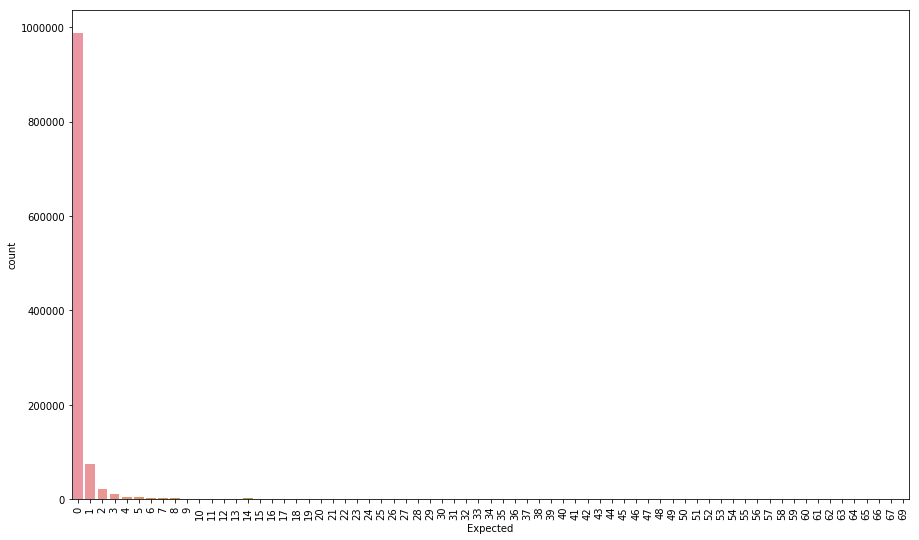

In [24]:
plt.subplots(figsize=(15,9))
plt.xticks(rotation='90')                   # for rotation of 90 degree
sns.countplot(train['Expected'])

 RR1:Rain rate from HCA-based algorithm. I will take the mean of the values at all the times recorded and this will be our first feature

## RR1

I have chosen RR1 first because when we see train data you can see that if RR1 is non-zero then the rainfall is non-zero and if RR1 contains values like -99900 or -99901 or -99902 then also the expected rainfall was zero.

So I will use one feature and that is RR1. The results for this submission are written below.

In [25]:
# k=list(map(float,train['RR1'][6].split()))
l=[]                                                    # empty list 
for i in train.index:
    k=list(map(float,train['RR1'][i].split()))
    k=[0 if (x==-99900.0 or x==-99901.0 or x==-99903.0) else x for x in k]
    mean=sum(k)/len(k)
    l.append(mean)

In [26]:
rr1=np.array(l)
rr1.shape=(train.shape[0],1)
print(rr1.shape)

(1121112, 1)


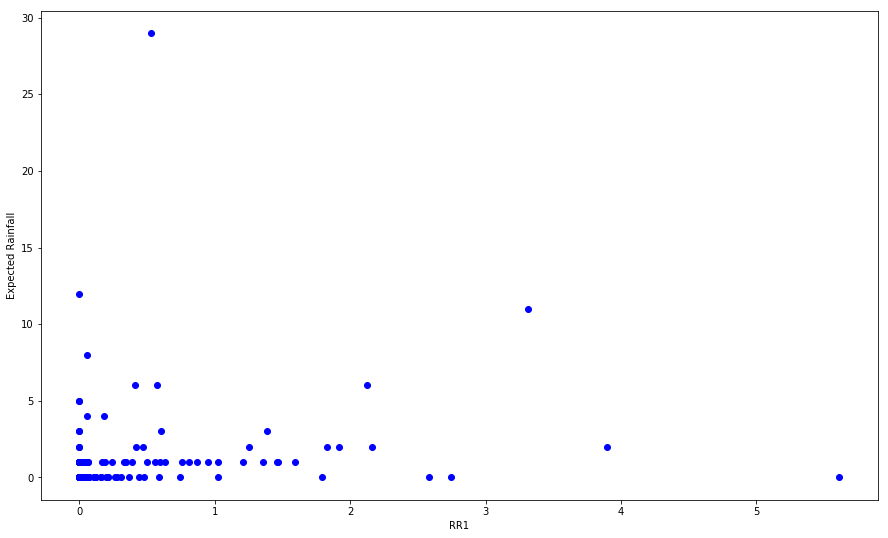

In [27]:
plt.subplots(figsize=(15,9))
plt.scatter(rr1[0:500,:],train['Expected'].head(500),color='blue')
plt.xlabel("RR1")
plt.ylabel("Expected Rainfall")
plt.show()

In [28]:
l=[]
for i in test.index:
    k=list(map(float,test['RR1'][i].split()))
    k=[0 if (x==-99900.0 or x==-99901.0 or x==-99903.0) else x for x in k]
    mean=sum(k)/len(k)
    l.append(mean)

In [29]:
rr1_test=np.array(l)
rr1_test.shape=(test.shape[0],1)
print(rr1_test.shape)

(630452, 1)


I removed the code for submission.

With the above model I got a public score of 0.00842523 and private score of 0.00842799 which is not bad. This model was better than the benchmark models.
With this score the submission rank was 74 in public and 72 in private. So now we are having a rank of less than 100.
I also tried with other learning rates

0.1 : The results were decent

0.3  : The score got worsened and the error was greater when compared with 0.1 learning rate (got a score of 0.13)
Basic models were better than this.

0.9 : The results were not good.

## RR2

As the above model performed better than benchmark models. So I included another feature RR2: Rain rate from Zdr-based algorithm in the training matrix. The results got improved but by a small margin.The scores of this model are given below

In [30]:
# converting rr2 into mean values in train data
j=[]                                                    # empty list 
for i in train.index:
    k=list(map(float,train['RR2'][i].split()))
    k=[0 if (x==-99900.0 or x==-99901.0 or x==-99903.0) else x for x in k]
    mean=sum(k)/len(k)
    j.append(mean)

In [31]:
rr2=np.array(j)
rr2.shape=(train.shape[0],1)
print(rr2.shape)

(1121112, 1)


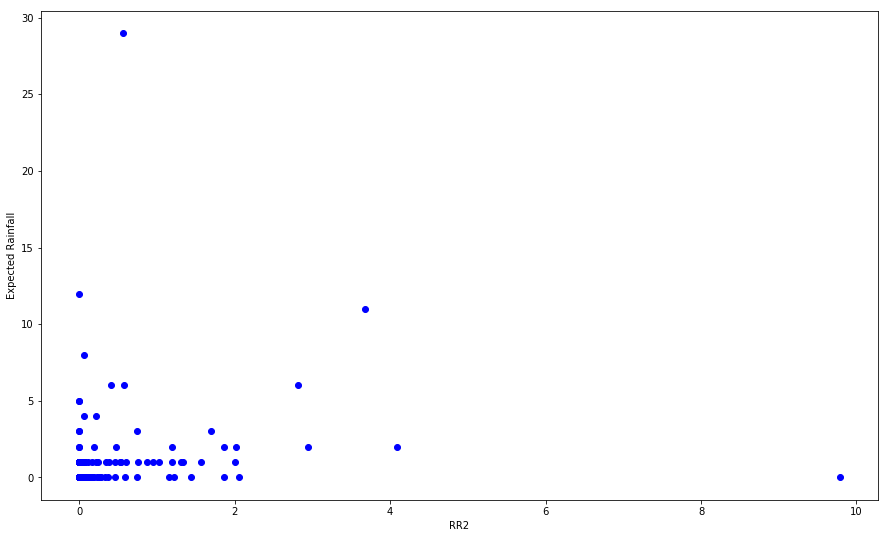

In [32]:
plt.subplots(figsize=(15,9))
plt.scatter(rr2[0:500,:],train['Expected'].head(500),color='blue')
plt.xlabel("RR2")
plt.ylabel("Expected Rainfall")
plt.show()

In [33]:
# converting rr2 values into mean values in test data 
j=[]                                                    # empty list 
for i in test.index:
    k=list(map(float,test['RR2'][i].split()))
    k=[0 if (x==-99900.0 or x==-99901.0 or x==-99903.0) else x for x in k]
    mean=sum(k)/len(k)
    j.append(mean)

In [34]:
rr2_test=np.array(j)
rr2_test.shape=(test.shape[0],1)
print(rr2_test.shape)

(630452, 1)


I removed the code for submission.

With RR2 as a feature I got a public score of 0.00839472 and private score of 0.00840271. This score will give rank of 70 in private leaderboard.

## RR3


I included another feature RR3: Rain rate from Kdp-based algorithm in the training matrix. This model performed bad compared to the above model.The scores of this model are given below

In [35]:
j=[]                                                    # empty list 
for i in train.index:
    k=list(map(float,train['RR3'][i].split()))
    k=[0 if (x==-99900.0 or x==-99901.0 or x==-99903.0) else x for x in k]
    mean=sum(k)/len(k)
    j.append(mean)

In [36]:
rr3=np.array(j)
rr3.shape=(train.shape[0],1)
print(rr3.shape)

(1121112, 1)


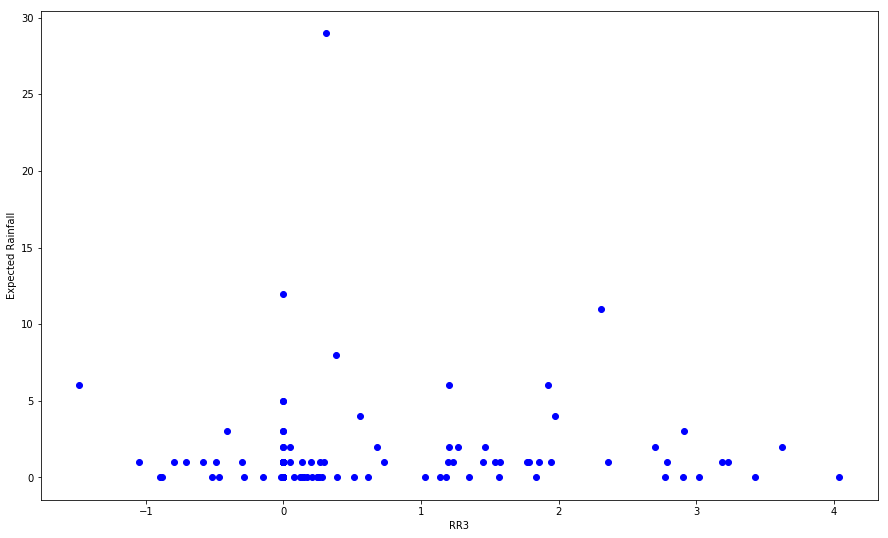

In [37]:
plt.subplots(figsize=(15,9))
plt.scatter(rr3[0:500,:],train['Expected'].head(500),color='blue')
plt.xlabel("RR3")
plt.ylabel("Expected Rainfall")
plt.show()

In [38]:
j=[]                                                    # empty list 
for i in test.index:
    k=list(map(float,test['RR2'][i].split()))
    k=[0 if (x==-99900.0 or x==-99901.0 or x==-99903.0) else x for x in k]
    mean=sum(k)/len(k)
    j.append(mean)

In [39]:
rr3_test=np.array(j)
rr3_test.shape=(test.shape[0],1)
print(rr3_test.shape)

(630452, 1)


I removed the code for submission.

With RR3 as another feature I got a public score of 0.00840888 and private score of 0.00841514. The model performed bad compared to above model

## ADDING MORE FEATURES 

As we can easily see that from RR1 to RR3 the score has not changed much. So now its time to get to another features and explore more.
As the error increased when we added a feature RR3. So i am currently removing it as a feature 
 
## Radar Quality Index

I will add Radar quality index as another feature.It is given that if it is zero then it is bad data and if it is 1 then it is good data. This will be useful in predicting the rainfall because this will classify the dat as bad or good.

The missing values are 999.0 and description was that 999.0 means they can't the compute the radar quality index.
Suppose if the observation contains more 999.0 then it is of course a bad data. So I will take the mean of all the values and if the observation is 999.0 I will replace it with zero as zero corresponds to bad data 

In [40]:
p=[]
for i in train.index:
    k=list(map(float,train['RadarQualityIndex'][i].split()))
    k=[0.0 if x==999.0 else x for x in k]
    m=sum(k)/float(len(k))
    p.append(m)

In [41]:
RQi=np.array(p)
RQi.shape=(train.shape[0],1)
print(RQi.shape)

(1121112, 1)


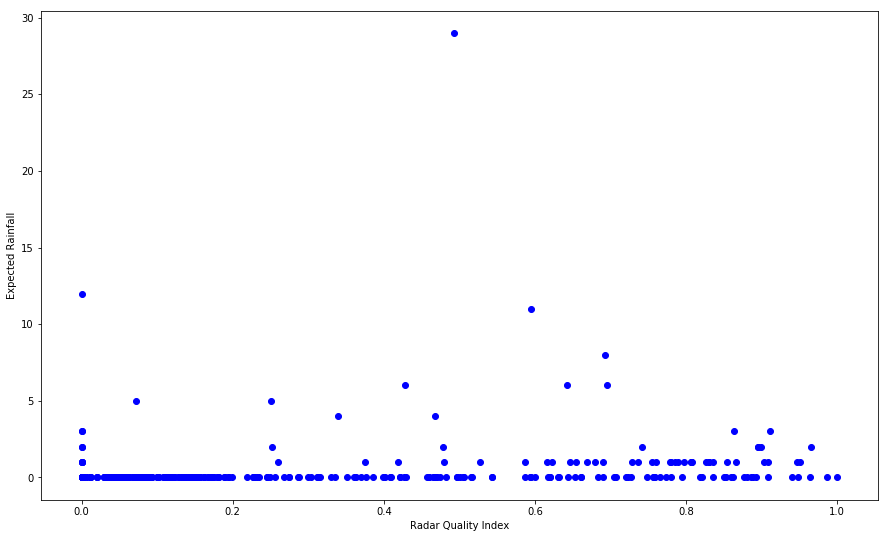

In [42]:
plt.subplots(figsize=(15,9))
plt.scatter(RQi[0:500,:],train['Expected'].head(500),color='blue')
plt.xlabel("Radar Quality Index")
plt.ylabel("Expected Rainfall")
plt.show()

In [43]:
p=[]
for i in test.index:
    k=list(map(float,test['RadarQualityIndex'][i].split()))
    k=[0.0 if x==999.0 else x for x in k]
    m=sum(k)/float(len(k))
    p.append(m)

In [44]:
RQi_test=np.array(p)
RQi_test.shape=(test.shape[0],1)
print(RQi.shape)

(1121112, 1)


I removed the code for submission

With this model I got public score of 0.00835402 and private score of 0.00836117 and this will give you a rank of 65 in private learderboard in public leaderboard also.

## NUMBER OF RADAR SCANS

I am thinking that if the number of radar scans are more then may be the rainfall prediction will be accurate.
So I am going to include this feature. I have read a article on this problem and article suggest that there is good correlation between number of scans and rainfall.

Number of scans will be equal to number of spaces plus one in TimeToEnd column.

In [47]:
train['TimeToEnd'][0].count(" ")+1

8

In [48]:
numberofscans=[]
for i in train.index:
    number=train['TimeToEnd'][i].count(" ")+1
    numberofscans.append(number)

numberofscans=np.array(numberofscans).reshape(train.shape[0],1)
print(numberofscans.shape)

(1121112, 1)


Text(0,0.5,'RAINFALL')

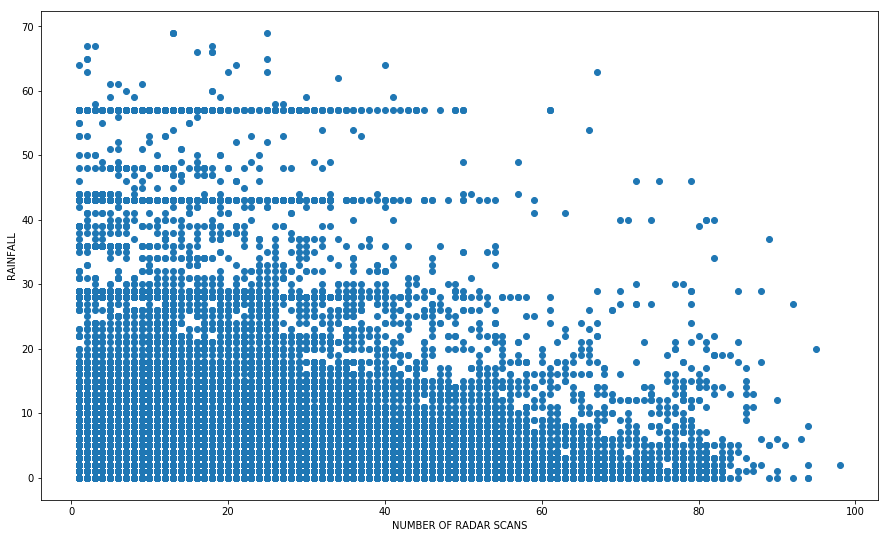

In [49]:
plt.subplots(figsize=(15,9))
plt.scatter(numberofscans,y.reshape(train.shape[0],1))
plt.xlabel("NUMBER OF RADAR SCANS")
plt.ylabel("RAINFALL")

In [50]:
numberofscans_test=[]
for i in test.index:
    number=test['TimeToEnd'][i].count(" ")+1
    numberofscans_test.append(number)

numberofscans_test=np.array(numberofscans_test).reshape(test.shape[0],1)
print(numberofscans_test.shape)

(630452, 1)


I removed for the code for submission.

With this model I got a public score of 0.00816744 and private score of 0.00816330 and this will give you a rank of 52 in private leaderboard.

## REFLECTIVITY QC

As you can see from the train data you can see that reflectivity is zero in most cases if we replace -99900 as zero
and while the reflectivity is zero the rainfall is also zero.

In [51]:
r=[]
for i in train.index:
    k=list(map(float,train['ReflectivityQC'][i].split()))
    k=[0 if (x==-99900.0 or x==-99901.0 or x==-99903.0) else x for x in k]
    m=sum(k)/len(k)
    r.append(m)

reflectivity=np.array(r).reshape(train.shape[0],1)
print(reflectivity.shape)

(1121112, 1)


In [52]:
r=[]
for i in test.index:
    k=list(map(float,test['ReflectivityQC'][i].split()))
    k=[0 if (x==-99900.0 or x==-99901.0 or x==-99903.0) else x for x in k]
    m=sum(k)/len(k)
    r.append(m)
    
reflectivity_test=np.array(r).reshape(test.shape[0],1)
print(reflectivity_test.shape)

(630452, 1)


I removed the code for submission.

With this model(Xgboost) I got a public score of 0.00787731 and private score of 0.00786504. With this score you will get rank of 32 in leaderboard.


## HYBRID SCAN

HybridScan: Reflectivity in elevation scan closest to ground is also related to reflectivity. So my plan is to include this feature also

In [53]:
r=[]
for i in train.index:
    k=list(map(float,train['HybridScan'][i].split()))
    k=[0 if (x==-99900.0 or x==-99901.0 or x==-99903.0) else x for x in k]
    m=sum(k)/len(k)
    r.append(m)

hybrid=np.array(r).reshape(train.shape[0],1)
print(hybrid.shape)

(1121112, 1)


In [54]:
r=[]
for i in test.index:
    k=list(map(float,test['HybridScan'][i].split()))
    k=[0 if (x==-99900.0 or x==-99901.0 or x==-99903.0) else x for x in k]
    m=sum(k)/len(k)
    r.append(m)
    
hybrid_test=np.array(r).reshape(test.shape[0],1)
print(hybrid_test.shape)

(630452, 1)


## TRAINING MATRICES

In [57]:
X=np.hstack((rr1,rr2,RQi,numberofscans,reflectivity,hybrid))
print(X.shape)
print(y.shape)

(1121112, 6)
(1121112,)


In [58]:
X_test=np.hstack((rr1_test,rr2_test,RQi_test,numberofscans_test,reflectivity_test,hybrid_test))
print(X_test.shape)

(630452, 6)


## TRAINING

This time we will be using two models random forest and Xgboost and we will see the individual score and after that I am thinking to ensemble these models with weighted voting

### XGB

In [59]:
xgb=XGBClassifier()
xgb.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [60]:
xgb_predict=xgb.predict_proba(X_test)
print(xgb_predict.shape)

(630452, 69)


In [61]:
temp=xgb_predict[:,68].reshape(test.shape[0],1)
xgb_predict[:,68]=0.0
xgb_predict=np.hstack((xgb_predict,temp))
print(xgb_predict.shape)

(630452, 70)


In [62]:
xgb_predict=np.cumsum(xgb_predict,axis=1)
print(xgb_predict.shape)

(630452, 70)


In [63]:
hybrid_data=pd.DataFrame(xgb_predict,columns=cols)
hybrid_data.head(10)

,Predicted0,Predicted1,Predicted2,Predicted3,Predicted4,Predicted5,Predicted6,Predicted7,Predicted8,Predicted9,...,Predicted60,Predicted61,Predicted62,Predicted63,Predicted64,Predicted65,Predicted66,Predicted67,Predicted68,Predicted69
0,0.780241,0.940083,0.965063,0.974405,0.978277,0.981279,0.983565,0.985074,0.986108,0.986948,...,0.999589,0.999642,0.999691,0.999743,0.999795,0.999846,0.999897,0.999948,0.999948,0.999948
1,0.970505,0.989581,0.992667,0.994377,0.995204,0.995921,0.996444,0.996798,0.997022,0.997182,...,0.999860,0.999878,0.999895,0.999912,0.999930,0.999949,0.999966,0.999983,0.999983,0.999983
2,0.970505,0.989581,0.992667,0.994377,0.995204,0.995921,0.996444,0.996798,0.997022,0.997182,...,0.999860,0.999878,0.999895,0.999912,0.999930,0.999949,0.999966,0.999983,0.999983,0.999983
3,0.992641,0.997305,0.997792,0.998043,0.998247,0.998466,0.998625,0.998726,0.998790,0.998839,...,0.999909,0.999922,0.999933,0.999944,0.999955,0.999967,0.999978,0.999989,0.999989,0.999989
4,0.989428,0.995589,0.996378,0.996903,0.997245,0.997569,0.997879,0.998076,0.998178,0.998259,...,0.999905,0.999919,0.999930,0.999942,0.999953,0.999965,0.999977,0.999988,0.999988,0.999988
5,0.985532,0.995705,0.996667,0.997122,0.997370,0.997640,0.997827,0.997957,0.998072,0.998135,...,0.999893,0.999909,0.999921,0.999934,0.999948,0.999961,0.999974,0.999987,0.999987,0.999987
6,0.971991,0.989570,0.992731,0.994431,0.995252,0.995966,0.996485,0.996838,0.997061,0.997213,...,0.999854,0.999873,0.999889,0.999906,0.999924,0.999949,0.999966,0.999983,0.999983,0.999983
7,0.953553,0.987372,0.993330,0.995216,0.995885,0.996350,0.996688,0.996997,0.997177,0.997307,...,0.999819,0.999842,0.999864,0.999887,0.999910,0.999932,0.999955,0.999977,0.999977,0.999977
8,0.989428,0.995589,0.996378,0.996903,0.997245,0.997569,0.997879,0.998076,0.998178,0.998259,...,0.999905,0.999919,0.999930,0.999942,0.999953,0.999965,0.999977,0.999988,0.999988,0.999988
9,0.187911,0.330512,0.447309,0.493869,0.553323,0.618264,0.682053,0.751388,0.806204,0.847667,...,0.999347,0.999428,0.999504,0.999582,0.999683,0.999762,0.999843,0.999921,0.999921,0.999921


In [64]:
hybrid_data=pd.concat([test['Id'],hybrid_data],axis=1)
hybrid_data.to_csv("hybrid.csv",index=False)
print("Done")

Done


With this i got a public score of 0.00783509 and private score of 0.00782772 and a rank of 31 in private leaderboard.
Till now this is the best model which outperformed all other models. 

I also tried ensembling with random forest algorithm but the results didn't improved. 

## RANDOM FOREST 

In [65]:
rf=RandomForestClassifier(n_estimators=10,random_state=42)
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [66]:
f=rf.predict_proba(X_test)
f.shape

(630452, 69)

In [67]:
temp=f[:,68].reshape(test.shape[0],1)
f[:,68]=0
f=np.hstack((f,temp))
f=np.cumsum(f,axis=1)
print(f.shape)

(630452, 70)


In [68]:
hybrid_rf=pd.DataFrame(f,columns=cols)
hybrid_rf=pd.concat([test['Id'],hybrid_rf],axis=1)
hybrid_rf.head(10)

,Id,Predicted0,Predicted1,Predicted2,Predicted3,Predicted4,Predicted5,Predicted6,Predicted7,Predicted8,...,Predicted60,Predicted61,Predicted62,Predicted63,Predicted64,Predicted65,Predicted66,Predicted67,Predicted68,Predicted69
0,1,0.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0
1,2,0.968591,0.989357,0.992740,0.994855,0.995848,0.996593,0.997245,0.997646,0.997892,...,0.999990,0.999990,0.999990,0.999990,1.000000,1.0,1.0,1.0,1.0,1.0
2,3,0.968591,0.989357,0.992740,0.994855,0.995848,0.996593,0.997245,0.997646,0.997892,...,0.999990,0.999990,0.999990,0.999990,1.000000,1.0,1.0,1.0,1.0,1.0
3,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0
4,5,0.991325,0.997508,0.998076,0.998352,0.998482,0.998708,0.998903,0.998999,0.999049,...,0.999991,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0
5,6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0
6,7,0.972083,0.989391,0.993203,0.994987,0.995990,0.996744,0.997114,0.997560,0.997808,...,0.999967,0.999967,0.999967,0.999967,0.999967,1.0,1.0,1.0,1.0,1.0
7,8,0.900000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0
8,9,0.991325,0.997508,0.998076,0.998352,0.998482,0.998708,0.998903,0.998999,0.999049,...,0.999991,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0
9,10,0.100000,0.400000,0.500000,0.600000,0.700000,0.900000,0.900000,0.900000,0.900000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0


In [69]:
hybrid_rf[hybrid_rf[cols]>1]=1

In [70]:
hybrid_rf.to_csv("hybrid_rf.csv",index=False)

## ENSEMBLING

Ensembling is a general term for combining many classifiers by averaging or voting.Generally, ensembles of classifiers perform better than single classifiers, and the averaging process allows for moregranularity of choice in the bias-variance tradeoff.

In [71]:
print(hybrid_data.shape,hybrid_rf.shape)

(630452, 71) (630452, 71)


## AVERAGING

In [72]:
ensemble=hybrid_data[cols]*0.8+hybrid_rf[cols]*0.2
ensemble.head(10)

,Predicted0,Predicted1,Predicted2,Predicted3,Predicted4,Predicted5,Predicted6,Predicted7,Predicted8,Predicted9,...,Predicted60,Predicted61,Predicted62,Predicted63,Predicted64,Predicted65,Predicted66,Predicted67,Predicted68,Predicted69
0,0.744193,0.952066,0.972051,0.979524,0.982622,0.985024,0.986852,0.988059,0.988886,0.989558,...,0.999671,0.999713,0.999753,0.999794,0.999836,0.999877,0.999918,0.999958,0.999958,0.999958
1,0.970122,0.989536,0.992682,0.994473,0.995332,0.996056,0.996604,0.996968,0.997196,0.997365,...,0.999886,0.999901,0.999914,0.999928,0.999944,0.999959,0.999972,0.999986,0.999986,0.999986
2,0.970122,0.989536,0.992682,0.994473,0.995332,0.996056,0.996604,0.996968,0.997196,0.997365,...,0.999886,0.999901,0.999914,0.999928,0.999944,0.999959,0.999972,0.999986,0.999986,0.999986
3,0.994113,0.997844,0.998234,0.998435,0.998597,0.998772,0.998900,0.998980,0.999032,0.999071,...,0.999927,0.999938,0.999946,0.999955,0.999964,0.999973,0.999982,0.999991,0.999991,0.999991
4,0.989808,0.995973,0.996718,0.997193,0.997493,0.997797,0.998084,0.998260,0.998352,0.998430,...,0.999922,0.999935,0.999944,0.999953,0.999963,0.999972,0.999981,0.999991,0.999991,0.999991
5,0.988426,0.996564,0.997333,0.997697,0.997896,0.998112,0.998261,0.998365,0.998458,0.998508,...,0.999914,0.999927,0.999937,0.999948,0.999958,0.999969,0.999979,0.999989,0.999989,0.999989
6,0.972009,0.989534,0.992825,0.994542,0.995400,0.996122,0.996611,0.996982,0.997210,0.997359,...,0.999877,0.999892,0.999905,0.999919,0.999932,0.999959,0.999973,0.999986,0.999986,0.999986
7,0.942843,0.989898,0.994664,0.996173,0.996708,0.997080,0.997350,0.997598,0.997741,0.997845,...,0.999855,0.999874,0.999891,0.999910,0.999928,0.999946,0.999964,0.999982,0.999982,0.999982
8,0.989808,0.995973,0.996718,0.997193,0.997493,0.997797,0.998084,0.998260,0.998352,0.998430,...,0.999922,0.999935,0.999944,0.999953,0.999963,0.999972,0.999981,0.999991,0.999991,0.999991
9,0.170328,0.344410,0.457847,0.515095,0.582658,0.674611,0.725642,0.781111,0.824963,0.878133,...,0.999478,0.999542,0.999603,0.999666,0.999747,0.999810,0.999875,0.999937,0.999937,0.999937


In [73]:
ensemble=pd.concat([test['Id'],ensemble],axis=1)
ensemble.to_csv("random_forest+Xgboost.csv",index=False)
print("Done")

Done


This end's our journey of predicting the rainfall 


In Chinese mythology, the one who can predict the rain is known as the messenger who can talk to "the ruler of the ocean, the dragon king" ! :) :)

Thanks for reading !!